<a href="https://colab.research.google.com/github/cicamontana/Arduino/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Panel_Model_forest1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****   Start   ****
weather_current: /n                     Date  Time  WeekDay  Month   temp  temp_min  temp_max  \
0    2023-06-28 18:00:00    12        2      6  27.95     27.95     27.95   
1    2023-06-28 18:00:00    12        2      6  27.95     27.95     27.95   
2    2023-06-28 18:00:00    12        2      6  27.95     27.95     27.95   
3    2023-06-28 18:00:00    12        2      6  27.95     27.95     27.95   
4    2023-06-28 18:00:00    12        2      6  27.95     27.95     27.95   
...                  ...   ...      ...    ...    ...       ...       ...   
3888 2023-12-10 06:00:00     0        6     12  -7.05     -7.05     -7.05   
3889 2023-12-10 07:00:00     1        6     12  -8.05     -8.05     -8.05   
3890 2023-12-10 07:00:00     1        6     12  -8.05     -8.05     -8.05   
3891 2023-12-10 07:00:00     1        6     12  -8.05     -8.05     -8.05   
3892 2023-12-10 08:00:00     2        6     12  -8.05     -8.05     -8.05   

      clouds  weather_id  
0       

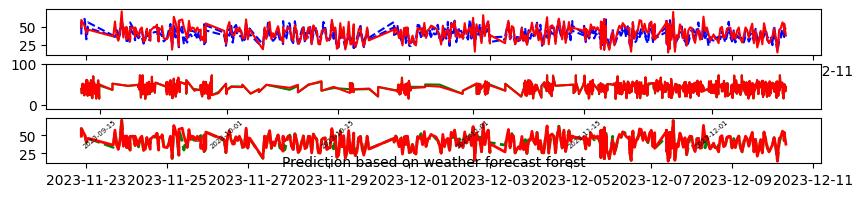

In [ ]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import threading, time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
import urllib.request ,csv

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from numpy import array


path_file2 = Path("/content/drive/MyDrive/Python/SerialFrom_panel_norm4.csv")
path_file_weather = Path("/content/drive/MyDrive/Python/Weather.csv")
#path_file_weather = "https://www.pythonanywhere.com/user/Gregdimon/shares/00e9f73392d646599e43cc870aa5ea09/"
path_file_w_forecast = Path("/content/drive/MyDrive/Python/Weather_forecast2.csv")
norm_file = Path("/content/drive/MyDrive/Python/norm_file3.csv") #norm_file4Test
#norm_file = "https://www.pythonanywhere.com/user/Gregdimon/shares/48ba140da5864c03ac703d716d35a065/"
current_file1 = pd.DataFrame()
df = pd.DataFrame()
data = pd.DataFrame()
df_in = pd.DataFrame()
df_in2 = pd.DataFrame()
yout = pd.DataFrame()
analise = pd.DataFrame()

panel_d = pd.DataFrame()
panel_data = pd.DataFrame()
ustom_column_names2 = ['Date', 'panel', 'exchanger', 't', 't2', 'sun']

data = pd.DataFrame()
hourly = pd.DataFrame()

shape = (20000, 2)
y_norm = np.array((20000, 2)) # np.array(shape)#np.array(range(20000) ,range(3), float)
y_norm.shape


sumPanTemp = 0
sumInsulation = float(0)



plt.ion()
fig = plt.figure(figsize=(10, 2))


n = int
n = 0

i = int

i = 0


#weather_forecast_df = pd.DataFrame()
weather_forecast1_df = pd.DataFrame()
raws = pd.DataFrame()
weather_forecast1 = pd.DataFrame()
weather_forecast3 = pd.DataFrame()
weather_forecast4 = pd.DataFrame()

xin_pr = str
# fix random seed for reproducibility
tf.random.set_seed(7)

def everage_hour(norm_data):
    # Ensure 'Date' column is a datetime type and set as the index
    norm_data['Date'] = pd.to_datetime(norm_data['Date'])
    norm_data.set_index('Date', inplace=True)

    # Resample data to hourly frequency and calculate mean
    data_ever = norm_data.resample('1H').mean().reset_index()

    # Handle missing values, if any
    data_ever.ffill(inplace=True)

    return data_ever

def draw_graph(dates,input_data, input_name = str, colour_name = str, delta_n = float):
    if delta_n != '':
        plt.fill_between(dates, input_data - delta_n, input_data + delta_n, color="#3F5D7D") #"#3F5D7D"
        plt.plot(dates, input_data, color=colour_name, linestyle='-', label=input_name)
    else:
        plt.plot(dates, input_data, color=colour_name, linestyle='-', label=input_name)

    # Axis limits
    # s, e = plt.gca().get_xlim()
    # plt.xlim(s, e-2)

    return


# split a multivariate sequence into samples
def split_sequences(Xses, Yks, n_steps):
    X, y = list(), list()
    for i in range(len(Xses)):
 # find the end of this pattern
        end_ix = i + n_steps
 # check if we are beyond the dataset
        if end_ix > len(Xses):
            break
 # gather input and output parts of the pattern
        seq_x = Xses[i:end_ix, :] #-1
        seq_y = Yks[i:end_ix,]
        #seq_x, seq_y = Xses[i:end_ix, :], Yks[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    print("array(X), array(y)", array(X), array(y))
    return array(X), array(y)



print("****   Start   ****")

n = int

weather_current = pd.DataFrame()

#weather_current = pd.read_csv(path_file_weather, sep=',',  header=0, encoding='utf-8',error_bad_lines=False)


weather_current = pd.read_csv(path_file_weather) #names=custom_column_names , header=0

weather_current['Date'] = pd.to_datetime(weather_current['Date'], format="%Y-%m-%d %H")
weather_current['Date'] = weather_current['Date'] + pd.to_timedelta(6,unit='h')
#print("Type",type(weather_current.at [2,'Date'] ))
#weather_current['Date'] = weather_current['Date'].replace(minute=0, second=0, microsecond=0)
#dt.round('60min')

weather_current.drop_duplicates ('Date', 'last')
weather_current['Date'] = weather_current['Date'].dt.floor('H')
print("weather_current: /n", weather_current)

norm_data = pd.DataFrame
norm_data = pd.read_csv(norm_file)
len(norm_data)


norm_data['Date'] = pd.to_datetime(norm_data['time'], format="%Y-%m-%d %H:%M:%S") # errors = 'ignore', format="%Y-%m-%d %H:%M:%S"

norm_data['exchanger'] =  pd.to_numeric(norm_data['exchanger'])
norm_data['panel'] =  pd.to_numeric(norm_data['panel'])
#norm_data.drop(norm_data[len(norm_data['panel']) > 5].index, inplace = True)

   # minmax = data_ever.max()
data_ever = everage_hour(norm_data)
data_ever['Date'] = data_ever['Date'].dt.floor('H')
print("data_ever: /n" , data_ever)
weather_current1 = pd.DataFrame

# Merge DataFrames based on the datetime_column
merged_data = pd.merge(weather_current, data_ever, on='Date', how='inner')


X = merged_data[['Time','WeekDay','Month','temp','temp_min','temp_max','clouds','weather_id']]
y = merged_data[['panel',  'exchanger']]



# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # random 42


prediction_dates = merged_data['Date'].tail(len(X_test)).ravel()

train_dates = merged_data['Date'].tail(len(X_train)).ravel()
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
y_all = scaler.fit_transform(y)
X_train_np = scaler.fit_transform(X_train)
X_test_np = scaler.transform(X_test)
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y1_train = y_train['exchanger']
y1_train_np = y1_train.to_numpy()
y1_test = y_test['exchanger']
y1_test_np = y1_test.to_numpy()

y_train_np = y_train.to_numpy()
#X_train_np = X_train.to_numpy()
y_test_np = y_test.to_numpy()
#X_test_np = X_test.to_numpy()

print("y1_train_np shape:", y1_train_np.shape)
print("y1_test_np shape:", y1_test_np.shape)
print("y_train shape:", y_train.shape)
print("y_test_np shape:", y_test_np.shape)
print("type_labels: ",type(y1_train_np))

unique_labels = np.unique(y1_train_np)
print("unique_labels: ",unique_labels)
#print("y_norm: ",  y_norm)

# Initialize Linear Regression model
model1 = LinearRegression()

# Fit the model on the training data
model1.fit(X_train_np, y_train_np)

# Make predictions on the testing data
y_pred = model1.predict(X_test_np)

# Evaluate the model
mse = mean_squared_error(y_test_np, y_pred)
print("Mean Squared Error:", mse)

# Predict a new value
new_X = [[6]]
#prediction = model.predict(new_X)
#print("Prediction for X=6:", prediction)

#draw_graph(prediction_dates, y_pred.ravel(), 'Linear Regression', 'blue', 0)
plt.subplot(3, 1, 1)
plt.plot(prediction_dates, y_pred,color='blue', linestyle='--', label='Line 1')

#plt.plot(y1_train_np,color='orange', linestyle='-.', label='Y all')
plt.subplot(3, 1, 1)
plt.plot(prediction_dates, y1_test_np,color='red', linestyle='-', label='Y all')
#raw_graph(prediction_dates, y1_test_np.ravel(), 'Measured', 'red', )
#plt.plot(x, y1, color='blue', linestyle='-', label='Line 1')
#plt.legend(y_pred)

# Create a Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=30, random_state=45)  # You can adjust hyperparameters

# Train the model using the training data
rf_model.fit(X_train_np, y1_train_np)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_np)
print("RF predictions: " ,  y_pred_rf)
# Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y1_test_np, y_pred_rf)
print(f"Mean Squared Error: {mse}")
#draw_graph(prediction_dates, y_pred.ravel(), 'Linear Regression', 'blue', 0)
plt.subplot(3, 1, 3)
#plt.xlabel('Prediction based on weather forecast forest', fontsize=10)

# Set font size for x-axis tick labels
#plt.xticks(fontsize=5 , rotation=40)

# Set font size for y-axis tick labels
#plt.yticks(fontsize=6)
plt.plot(prediction_dates, y_pred_rf, color='green', linestyle='--', label='Forest',lw=2)
plt.plot( prediction_dates, y1_test_np, color='red', linestyle='-', label='Forest',lw=2)

weather_forecast = pd.read_csv(path_file_w_forecast)

weather = weather_forecast
#print("weather_current: /n", weather)
weather['Date'] = pd.to_datetime(weather['Date'], format="%Y-%m-%d %H")
weather['Date'] = weather['Date'] + pd.to_timedelta(6,unit='h')
weather['Time'] = weather['Date'].dt.hour

weather.drop_duplicates ('Date', 'last')
prediction_weather_dates = weather['Date'].ravel()

#print("weather_current: /n", weather)
#weather.info()

weather_predict1_np = scaler.fit_transform(weather.drop(['Date'], axis=1))
weather_predict_np = scaler.transform(weather.drop(['Date'], axis=1))
#print("weather_predict_np: ", weather_predict_np)
# Display the shapes of the resulting sets
print("weather_predict shape: ", weather_predict_np.shape)

# Make predictions on the test data
y_pred_weath_rf = rf_model.predict(X_train_np) #weather_predict1_np
print("RF predictions dates: " ,  prediction_weather_dates)
# Evaluate the model's performance using Mean Squared Error

#draw_graph(prediction_dates, y_pred.ravel(), 'Linear Regression', 'blue', 0)
plt.subplot(3, 1, 2)
plt.xlabel('Prediction based on weather forecast forest', fontsize=10)

# Set font size for x-axis tick labels
plt.xticks(fontsize=5 , rotation=40)

# Set font size for y-axis tick labels
#plt.yticks(fontsize=6)
plt.plot(train_dates, y_pred_weath_rf, color='green', linestyle='-', label='Forest')
plt.plot(train_dates, y1_train_np, color='red', linestyle='-', label='Forest')

# Standardize features by removing the mean and scaling to unit variance
#scaler = StandardScaler()

"""

# Initialize Linear Regression model

y_pred_weather = model1.predict(weather_predict_np)

#draw_graph(prediction_dates, y_pred.ravel(), 'Linear Regression', 'blue', 0)
plt.subplot(3, 1, 2)
plt.xlabel('Prediction based on weather forecast', fontsize=10)

# Set font size for x-axis tick labels
plt.xticks(fontsize=5 , rotation=40)

# Set font size for y-axis tick labels
plt.yticks(fontsize=6)
plt.plot(prediction_weather_dates, y_pred_weather, color='blue', linestyle='--', label='Line 1',lw=0.5)
"""

# Axis limits
s, e = plt.gca().get_xlim()
#plt.xlim(s, (e-2)*10)
plt.ylim(-10, 100)
# Set the number of ticks on the x-axis
plt.locator_params(axis='x', nbins=30)
#plt.subplot(3, 1, 2)
plt.savefig('/content/drive/MyDrive/Python/plotPanel1_forest.png', dpi=120, bbox_inches='tight')


plt.show()
plt.pause(10)  # Note this correction
